In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
def histogram_equalization(image):
    # Pastikan citra dalam format numpy array dan grayscale
    image = np.array(image, dtype=np.uint8)
    
    # Langkah 1: Hitung histogram
    histogram, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    
    # Langkah 2: Hitung CDF
    cdf = histogram.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]  # Normalisasi ke rentang 0-255
    
    # Langkah 3: Pemetaan intensitas
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    image_equalized = image_equalized.reshape(image.shape).astype(np.uint8)
    
    return image_equalized, histogram, cdf_normalized

In [9]:
# Fungsi untuk visualisasi
def plot_histogram(image, equalized_image, histogram, cdf_normalized):
    plt.figure(figsize=(12, 8))
    
    # Citra asli
    plt.subplot(2, 2, 1)
    plt.title("Citra Asli")
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    # Citra setelah equalization
    plt.subplot(2, 2, 2)
    plt.title("Citra setelah Histogram Equalization")
    plt.imshow(equalized_image, cmap='gray')
    plt.axis('off')
    
    # Histogram asli
    plt.subplot(2, 2, 3)
    plt.title("Histogram Asli")
    plt.hist(image.flatten(), bins=256, range=[0,256], color='blue', alpha=0.5)
    plt.xlabel("Intensitas Piksel")
    plt.ylabel("Frekuensi")
    
    # Histogram setelah equalization + CDF
    plt.subplot(2, 2, 4)
    plt.title("Histogram setelah Equalization")
    plt.hist(equalized_image.flatten(), bins=256, range=[0,256], color='red', alpha=0.5)
    plt.xlabel("Intensitas Piksel")
    plt.ylabel("Frekuensi")
    
    plt.tight_layout()
    plt.show()

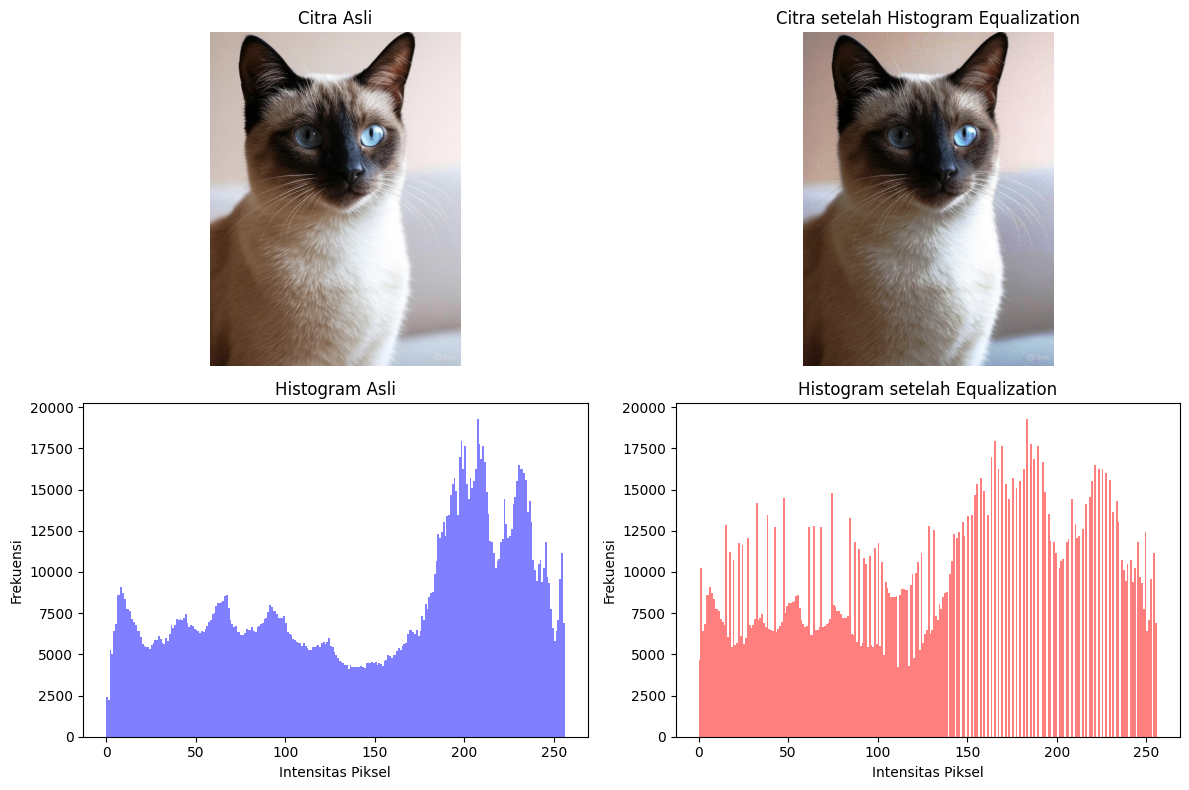

In [ ]:
if __name__ == "__main__":
    # Membuat citra grayscale contoh (atau ganti dengan citra nyata)
    img = cv2.imread("assets/Image.jpeg")
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Lakukan histogram equalization
    equalized_image, histogram, cdf_normalized = histogram_equalization(image)
    
    # Visualisasi hasil
    plot_histogram(image, equalized_image, histogram, cdf_normalized)